# Линейная регрессия

Данные содержатся в файле `data/lin_reg.txt`. Прочитать их можно следующим так:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('lin_reg.txt', names = ['x1', 'x2', 'x3', 'x4', 'y'])
X = df[['x1', 'x2', 'x3', 'x4']]
Y = df[['y']]

In [2]:
X.head()

,x1,x2,x3,x4
0,9.310,-17.043,20.807,11.109
1,-6.446,-12.460,-12.941,-14.715
2,14.324,-9.624,29.533,1.439
3,-19.511,9.563,-38.774,-1.116
4,-5.917,3.696,-11.428,13.364


In [3]:
X = np.array(X)
Y = np.array(Y)

При выполнении заданий **нельзя** пользоваться `scikit-learn` и т.п., только `NumPy`/`JAX`/`TF`/`PyTorch` и `matplotlib`/`seaborn`/`plotly`/etc.

1. Нарисуйте график среднеквадратичной ошибки в зависимости от параметра регуляризации $\alpha$, используя полные данные для обучения и для тестирования. 
2. Подготовьте исходные данные для 5 fold CV.
3. С помощью CV найдите оптимальное значение $\alpha$ на какой-нибудь сетке значений.
4. Постройте валидационную кривую. 
5. Постройте кривую обучения.

In [4]:
def forward_pass(W, b, X):
    y = X @ W + b
    return y
    
def compute_loss(W, b, y, y_true, alpha):
    loss = np.sum(np.square(y - y_true))/(y.shape[0]) + alpha * np.sum(np.square(W))
    return loss
    
def backward_pass(W, b, x_train, y_true, y_hat, alpha):
    m = y_hat.shape[0]
    db = 2.0 * np.sum(x_train @ W + b - y_true.reshape(y_true.shape[0], 1))/m    
    dW = 2.0 * ((x_train @ W + b - y_true.reshape(y_true.shape[0], 1)).T @ x_train) / m + 2.0 * alpha * W.T #np.dot((y_true.reshape(1, y_true.shape[0]) - y_hat.reshape(1, y_true.shape[0])), x_train) / m #+ 2.0 * alpha * W.T

    return dW, db
    
def update_params(W, b, dW, db, lr):
    W = W - lr * dW.reshape(num_features, 1)
    b = b - lr * db
    return W, b
        
def train(W, b, x_train, y_train, iterations, lr, alpha, print_ = False):
    losses = []
    w_ = []
    b_ = []
    w_.append(W)
    b_.append(b)
    for i in range(iterations):
        y_hat = forward_pass(W, b, x_train)
        dW, db = backward_pass(W, b, x_train, y_train, y_hat, alpha)
        W, b = update_params(W, b, dW, db, lr)
        loss = compute_loss(W, b, y_hat, y_train, alpha)
        losses.append(loss)
        w_.append(W)
        b_.append(b)
        if print_ == True:
            if i % int(iterations/10) == 0:
                print('Iter: {}, Current loss: {:.4f}'.format(i, loss))
    return W, b, losses, w_, b_

1. Нарисуйте график среднеквадратичной ошибки в зависимости от параметра регуляризации  𝛼 , используя полные данные для обучения и для тестирования.

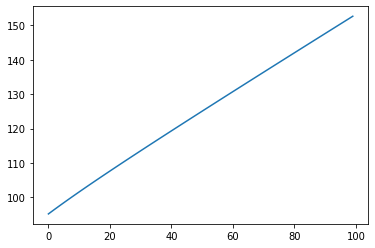

In [5]:
interval = np.linspace(0, 1, 100)
err = []
num_features = 4
W = np.zeros((num_features, 1))
b = 0
for alpha in interval:
    w_opt, b_opt, _, _, _ = train(W = W, b = b, x_train = X, y_train = Y, iterations = 3000, lr = 0.001, alpha = alpha)
    error = compute_loss(w_opt, b_opt, forward_pass(w_opt, b_opt, X), Y, alpha = alpha)
    err.append(error)
    
plt.plot(err)

2. Подготовьте исходные данные для 5 fold CV - далее используем это для решения 3 пункта

In [ ]:
cv = 5
freq = int(df.shape[0] / cv)

err_train = []
err_test = []

for step in range(0, X.shape[0], freq):
    fold = df[step:step + freq]

    X_test = X[step:step + freq]
    Y_test = Y[step:step + freq]
    X_train = X[0:step]
    X_train2 = X[step + freq:]
    X_train = np.concatenate((X_train, X_train2), axis=0)
    Y_train = Y[0:step]
    Y_train2 = Y[step + freq:]
    Y_train = np.concatenate((Y_train, Y_train2), axis=0)

    w_opt, b_opt, _, _, _ = train(W = W, b = b, x_train = X_train, y_train = Y_train, iterations = 3000, lr = 0.001, alpha = alpha)
    err_train.append(compute_loss(w_opt, b_opt, forward_pass(w_opt, b_opt, X_train), Y_train, alpha = alpha))
    err_test.append(compute_loss(w_opt, b_opt, forward_pass(w_opt, b_opt, X_test), Y_test, alpha = alpha))

err_train = np.array(err_train)
err_test = np.array(err_test)
result = err_test.mean()

3. С помощью CV найдите оптимальное значение  𝛼  на какой-нибудь сетке значений.

In [6]:
results = {}
cv = 5
interval = np.linspace(0, 1, 100)

W = np.zeros((num_features, 1))
b = 0

freq = int(X.shape[0] / cv)
for alpha in interval:
    
    err_train = []
    err_test = []

    for step in range(0, X.shape[0], freq):
        X_test = X[step:step + freq]
        Y_test = Y[step:step + freq]
        X_train = X[0:step]
        X_train2 = X[step + freq:]
        X_train = np.concatenate((X_train, X_train2), axis=0)
        Y_train = Y[0:step]
        Y_train2 = Y[step + freq:]
        Y_train = np.concatenate((Y_train, Y_train2), axis=0)

        w_opt, b_opt, _, _, _ = train(W = W, b = b, x_train = X_train, y_train = Y_train, iterations = 3000, lr = 0.001, alpha = alpha)
        err_train.append(compute_loss(w_opt, b_opt, forward_pass(w_opt, b_opt, X_train), Y_train, alpha = alpha))
        err_test.append(compute_loss(w_opt, b_opt, forward_pass(w_opt, b_opt, X_test), Y_test, alpha = alpha))

    err_train = np.array(err_train)
    err_test = np.array(err_test)
    result = err_test.mean()
    results[alpha] = result
    
min_alpha = min(results, key = results.get)
min_ = results[min_alpha]

print("лучшее альфа: ", min_alpha)
print("лучшее значение ошибки", min_)

лучшее альфа:  0.0
лучшее значение ошибки 96.1751637949671


4-5. Постройте валидационную кривую и кривую обучения.

Text(0.5, 1.0, 'Валидационная кривая и кривая обучения')

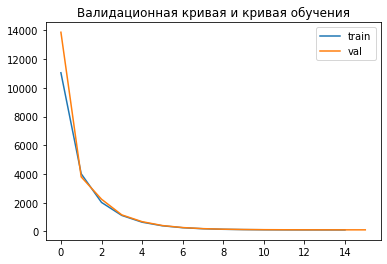

In [7]:
W = np.zeros((num_features, 1))
b = 0
test_losses = []
size = int(X.shape[0] * 0.8)
X_train = X[:size]
X_test = X[size:]
Y_train = Y[:size]
Y_test = Y[size:]
w_opt, b_opt, losses, w_, b_ = train(W = W, b = b, x_train = X_train, y_train = Y_train, iterations = 15, lr = 0.001, alpha = min_alpha)
for i in range (len(w_)):
    test_losses.append(compute_loss(w_[i], b_[i], forward_pass(w_[i], b_[i], X_test), Y_test, alpha = min_alpha))
    
plt.figure()
plt.plot(losses)
plt.plot(test_losses)

plt.legend(['train', 'val'])
plt.title('Валидационная кривая и кривая обучения')